In [2]:
%pylab inline
import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
import xarray as xr
import pandas as pd

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from dask.distributed import Client, progress
from dask_jobqueue import PBSCluster

In [6]:
cluster = PBSCluster(cores=8, memory='20 GB', interface='ib0',localdirectory='/short/e14/ss2778/tmp')
cluster

In [11]:
cluster.job_header = '#!/usr/bin/env bash\n#PBS -N dask-worker\n#PBS -q expressbw\n#PBS -l ncpus=8\n#PBS -l mem=20GB\n#PBS -l walltime=00:30:00\nJOB_ID=${PBS_JOBID%.*}'

In [12]:
client = Client(cluster)
client

Client Scheduler: tcp://10.9.105.3:43008 Dashboard: http://10.9.105.3:37732/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [13]:
cluster.scale(8)

In [14]:
 print(cluster.job_script())

#!/usr/bin/env zsh

#!/usr/bin/env bash
#PBS -N dask-worker
#PBS -q expressbw
#PBS -l ncpus=8
#PBS -l mem=20GB
#PBS -l walltime=00:30:00
JOB_ID=${PBS_JOBID%.*}



/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/bin/python -m distributed.cli.dask_worker tcp://10.9.105.3:43008 --nthreads 1 --nprocs 5 --memory-limit 4.00GB --name dask-worker--${JOB_ID}-- --death-timeout 60 --interface ib0 --interface ib0 --interface ib0 --interface ib0 --interface ib0 --interface ib0



In [6]:
aviso_clim_tstart = pd.to_datetime('1990', format='%Y')
aviso_clim_tend = aviso_clim_tstart + pd.DateOffset(years=10)
firstyear = pd.to_datetime(aviso_clim_tstart).year  # assumes tstart is 1 January!
lastyear = pd.to_datetime(aviso_clim_tend).year-1  # assumes tend is 1 January!
yearrange = str(firstyear)+'-'+str(lastyear)
print(yearrange)
print('aviso_clim_tstart = ', aviso_clim_tstart)
print('aviso_clim_tend = ', aviso_clim_tend)

1990-1999
aviso_clim_tstart =  1990-01-01 00:00:00
aviso_clim_tend =  2000-01-01 00:00:00


In [7]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [ ]:
#SH = (xr.open_mfdataset('/g/data1/ua8/JRA55-do/RYF/v1-3/RYF.q_10.1990_1991.nc'))
O1 = (xr.open_mfdataset('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091/output*/ice/OUTPUT/iceh.*.nc'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


# EKE Calculations

In [6]:
u1=O1['uocn_m']
v1=O1['vocn_m']

In [7]:
u_mean = u1.mean('time')
v_mean = v1.mean('time')

In [8]:
u_ = u1 - u_mean
v_ = v1 - v_mean

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 2514 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 2653 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 2693 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 2674 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 20563 was killed by unknown signal
distributed.nanny - WARNING - Re

KilledWorker: ('open_dataset-396217e75ae0269b042189416f235ed7vocn_m-20bde37d54ef0a837f7b5aa7216235cd', 'tcp://127.0.0.1:43514')

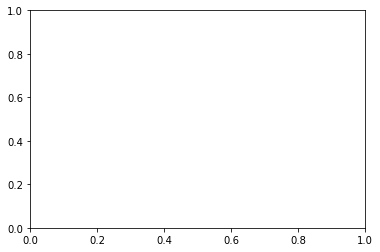

In [18]:
EKE = 0.5 * (u_**2 + v_**2)

In [28]:
#Seasonal Anomalies of EKE:
EKE_by_season = EKE.groupby('time.season').mean('time')

In [17]:
EKEm = EKE.isel(time=200)
EKEm.plot()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 1602 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 1603 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 1548 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 1599 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker process 2463 was killed by unknown signal
distributed.nanny - WARNING - Res

KilledWorker: ('open_dataset-c174c7549bd68f6873cef664ced45e54uocn_m-c4fb12a257310fbb1c692a77acd19035', 'tcp://127.0.0.1:40211')

In [21]:
EKE.load()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (yu_ocean: 1080, xu_ocean: 1440)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0

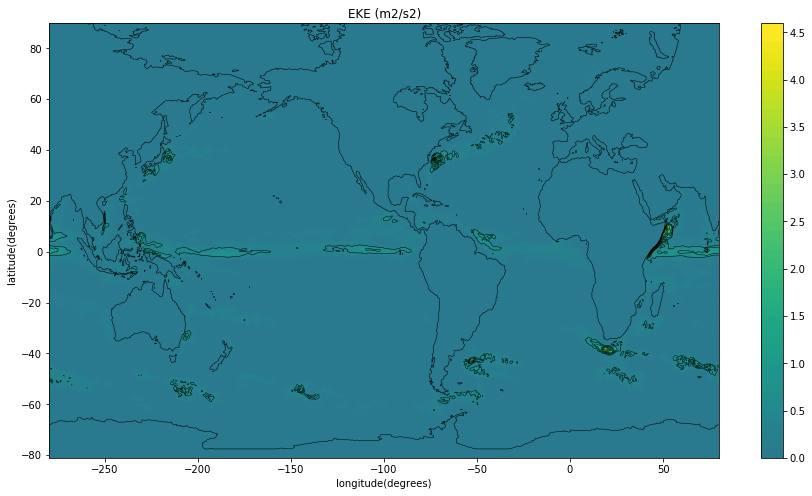

In [42]:
plt.figure(figsize=(15,8))
EKE_mean=EKE.mean('time')
X,Y=np.meshgrid(EKE.xu_ocean,EKE.yu_ocean)
h=plt.contourf(X,Y,EKE_mean,levels=100)
cb = plt.colorbar(h,orientation='vertical')
plt.contour(X,Y,EKE,levels=14, linewidths=0.5, colors='k')
plt.title('EKE (m2/s2)')
plt.ylabel('latitude(degrees)')
plt.xlabel('longitude(degrees)')
savefigure('EKE_mean')

In [ ]:
#EKE trend over 1958-2018
eke_time = EKE.time.values.astype('datetime64[M]').astype('float64')
etime = (eke_time-eke_time.mean())/eke_time.std()
eke=EKE-EKE.mean('time')
tl=len(EKE.time)
trend_eke= np.dot(etime,np.transpose(EKE.values,(1,0,2)))/tl

In [ ]:
plt.figure(figsize=(15,8))
X,Y=np.meshgrid(EKE.xu_ocean,EKE.yu_ocean)
h=plt.contourf(X,Y,trend_eke,levels=100)
cb = plt.colorbar(h,orientation='vertical')
plt.contour(X,Y,EKE,levels=14, linewidths=0.5, colors='k')
plt.title('EKE (m2/s2)')
plt.ylabel('latitude(degrees)')
plt.xlabel('longitude(degrees)')
savefigure('Trend_EKE_50years')